# A/B testing

## Flujo trabajo pruebas estadísticas:

- Definimos el problema:

    - Problema de proporciones:

        - Chi cuadrado

    - Problema de medias:

        - Si Datos normales: --> Saphiro / Ruso

            - Homogeneidad de varianzas: --> Levene

                - Si se cumple:

                    - T.test

                - No se cumple:

                    - Prueba no paramétrica --> Man Whitney

        - No normales:

            - Prueba no paramétrica --> Man Whitney


In [2]:
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_control = pd.read_csv("files/control_group.csv", sep =";")
df_control.head(2)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0


In [4]:
df_test = pd.read_csv("files/test_group.csv", sep = ";")
df_test.head(2)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677


In [5]:
df = pd.concat([df_control, df_test], axis = 0, ignore_index=True)
df.head(2)

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0


In [6]:
# vamos a cambiar el nombre de las columnas para que no tengan nombres tan extraños
columnas = [col.lower().split("[")[0].replace("#", "").strip().replace(" ", "_") for col in df.columns]
df.columns = columnas

In [7]:
df.head(2)

,campaign_name,date,spend,of_impressions,reach,of_website_clicks,of_searches,of_view_content,of_add_to_cart,of_purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0


In [8]:
# calculamos la Tasa de Clics
df['CTR'] = df['of_website_clicks'] / df['of_impressions']

# calculamos la Tasa de Conversión
df['CR'] = df['of_purchase'] / df['of_website_clicks']

# calculamos el Coste por Adquisición
df['CPA'] = df['spend'] / df['of_purchase']

# mostramos el DataFrame para confirmar que todo ha ido bien. 
df.head(2)

,campaign_name,date,spend,of_impressions,reach,of_website_clicks,of_searches,of_view_content,of_add_to_cart,of_purchase,CTR,CR,CPA
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.084835,0.088084,3.689320
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0.067003,0.063009,3.438356


In [10]:
df.head()

,campaign_name,date,spend,of_impressions,reach,of_website_clicks,of_searches,of_view_content,of_add_to_cart,of_purchase,CTR,CR,CPA
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0,0.084835,0.088084,3.689320
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0,0.067003,0.063009,3.438356
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0,0.049411,0.057160,6.298387
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0,0.042057,0.110930,5.705882
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
pd.crosstab(df["campaign_name"], df["CR"])

CR,0.030088,0.033494,0.033503,0.033846,0.037198,0.037591,0.041098,0.044782,0.046182,0.056554,0.057160,0.058375,0.059994,0.062288,0.063009,0.063636,0.065171,0.067218,0.071618,0.073304,0.074346,0.074755,0.079712,0.080645,0.080833,0.083844,0.083937,0.085149,0.085794,0.088084,0.088485,0.088531,0.091167,0.093165,0.102275,0.102313,0.107294,0.110930,0.115981,0.116875,0.119814,0.120661,0.122445,0.130030,0.130991,0.140573,0.143207,0.143839,0.145373,0.146249,0.173696,0.174298,0.178133,0.181034,0.189015,0.189672,0.210851,0.265286,0.322354
campaign_name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Control Campaign,0,1,1,0,0,0,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,0,1,0,0,1,1,1,0,1,1,1,0,0,1,1,0,1,1
Test Campaign,1,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,1,1,1,1,1,0,1,1,0,0,1,1,1,0,1,1,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0


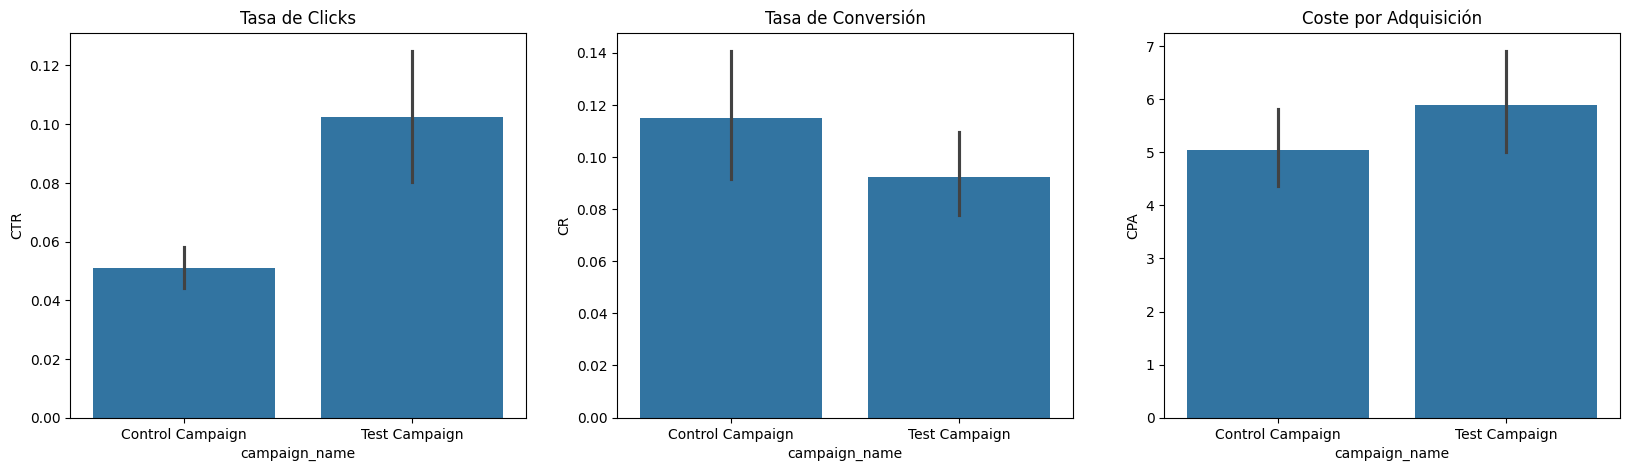

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

# Gráfico 1: Tasa de Clicks (CTR)
sns.barplot(x="campaign_name", y="CTR", data=df, ax=axes[0])
axes[0].set_title("Tasa de Clicks")

# Gráfico 2: Tasa de Conversión (CR)
sns.barplot(x="campaign_name", y="CR", data=df, ax=axes[1])
axes[1].set_title("Tasa de Conversión")

# Gráfico 3: Costo por Adquisición (CPA)
sns.barplot(x="campaign_name", y="CPA", data=df, ax=axes[2])
axes[2].set_title("Coste por Adquisición");

In [13]:
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['of_impressions', 'reach', 'of_website_clicks', 'of_searches',
       'of_view_content', 'of_add_to_cart', 'of_purchase', 'CTR', 'CR', 'CPA'],
      dtype='object')


In [14]:
# reemplazamos los valores nulos
for columna in nulos_esta_num:
    mediana = df[columna].median()
    df[columna] = df[columna].fillna(mediana)
    
# comprobamos que ya no queden valores nulos
df.isnull().sum()

campaign_name        0
date                 0
spend                0
of_impressions       0
reach                0
of_website_clicks    0
of_searches          0
of_view_content      0
of_add_to_cart       0
of_purchase          0
CTR                  0
CR                   0
CPA                  0
dtype: int64

In [15]:
statistic, p_value = stats.shapiro(df["CTR"])

In [16]:
p_value

np.float64(2.4146807171017314e-08)

In [19]:
if p_value > 0.05:
    print(f"Para la columna {columna} los datos siguen una distribución normal.")
else:
    print(f"Para la columna {columna} los datos no siguen una distribución normal.")


Para la columna CPA los datos no siguen una distribución normal.


In [20]:
# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")


In [21]:
metricas = ['CTR', 'CR', 'CPA']

for metrica in metricas:
    normalidad(df ,metrica)

Para la columna CTR los datos no siguen una distribución normal.
Para la columna CR los datos no siguen una distribución normal.
Para la columna CPA los datos no siguen una distribución normal.


In [22]:
def homogeneidad (dataframe, columna, columna_metrica):
    
    """
    Evalúa la homogeneidad de las varianzas entre grupos para una métrica específica en un DataFrame dado.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que contiene los datos.
    - columna (str): El nombre de la columna que se utilizará para dividir los datos en grupos.
    - columna_metrica (str): El nombre de la columna que se utilizará para evaluar la homogeneidad de las varianzas.

    Returns:
    No devuelve nada directamente, pero imprime en la consola si las varianzas son homogéneas o no entre los grupos.
    Se utiliza la prueba de Levene para evaluar la homogeneidad de las varianzas. Si el valor p resultante es mayor que 0.05,
    se concluye que las varianzas son homogéneas; de lo contrario, se concluye que las varianzas no son homogéneas.
    """
    
    # lo primero que tenemos que hacer es crear tantos conjuntos de datos para cada una de las categorías que tenemos, Control Campaign y Test Campaign
    valores_evaluar = []
    
    for valor in dataframe[columna].unique():
        valores_evaluar.append(dataframe[dataframe[columna]== valor][columna_metrica])

    statistic, p_value = stats.levene(*valores_evaluar)
    if p_value > 0.05:
        print(f"Para la métrica {columna_metrica} las varianzas son homogéneas entre grupos.")
    else:
        print(f"Para la métrica {columna_metrica}, las varianzas no son homogéneas entre grupos.")


In [23]:
metricas = ['CTR', 'CR', 'CPA']

for metrica in metricas:
    homogeneidad(df ,'campaign_name', metrica)

Para la métrica CTR, las varianzas no son homogéneas entre grupos.
Para la métrica CR las varianzas son homogéneas entre grupos.
Para la métrica CPA las varianzas son homogéneas entre grupos.


H0: NO existe diferencia significativa
H1: Existe diferencia significativa

p_value > 0.05 --> no rechazamos H0, no existe diferencia significativa entre los dos grupos!!

In [24]:
def test_man_whitney(dataframe, columnas_metricas, grupo_control, grupo_test, columna_grupos = "campaign_name"):

    """
    Realiza la prueba de Mann-Whitney U para comparar las medianas de las métricas entre dos grupos en un DataFrame dado.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que contiene los datos.
    - columnas_metricas (list): Una lista de nombres de columnas que representan las métricas a comparar entre los grupos.
    - grupo_control (str): El nombre del grupo de control en la columna especificada por columna_grupos.
    - grupo_test (str): El nombre del grupo de test en la columna especificada por columna_grupos.
    - columna_grupos (str): El nombre de la columna que contiene la información de los grupos. Por defecto, "campaign_name".

    Returns 
    No devuelve nada directamente, pero imprime en la consola si las medianas son diferentes o iguales para cada métrica.
    Se utiliza la prueba de Mann-Whitney U para evaluar si hay diferencias significativas entre los grupos.
    """
    # filtramos el DataFrame para quedarnos solo con los datos de control
    control = dataframe[dataframe[columna_grupos] == grupo_control]
    
    # filtramos el DataFrame para quedarnos solo con los datos de control
    test = dataframe[dataframe[columna_grupos] == grupo_test]
    
    
    # iteramos por las columnas de las metricas para ver si para cada una de ellas hay diferencias entre los grupos
    for metrica in columnas_metricas:
        
        # filtrams el conjunto de datos para quedarnos solo con la columna de la metrica que nos interesa
        metrica_control = control[metrica]
        metrica_test = test[metrica]
        
        # aplicamos el estadístico
        u_statistic, p_value = stats.mannwhitneyu(metrica_control, metrica_test)
        
        if p_value < 0.05:
            print(f"Para la métrica {metrica}, las medianas son diferentes.")
        else:
            print(f"Para la métrica {metrica}, las medianas son iguales.")
            
    


In [25]:
## llamamos a la función
test_man_whitney(df, metricas, "Control Campaign", "Test Campaign" )

Para la métrica CTR, las medianas son diferentes.
Para la métrica CR, las medianas son iguales.
Para la métrica CPA, las medianas son iguales.
